# Telecom Customer Churn Analysis

In [94]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
telco_base_data = pd.read_csv('Telco-Customer-Churn.csv')
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
telco_base_data.shape

(7043, 21)

## Data cleaning

In [97]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [98]:
# TotalCharges should be numeric
telco_data = telco_base_data.copy()
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')

In [99]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [100]:
telco_data.dropna(inplace=True)

In [101]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [102]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


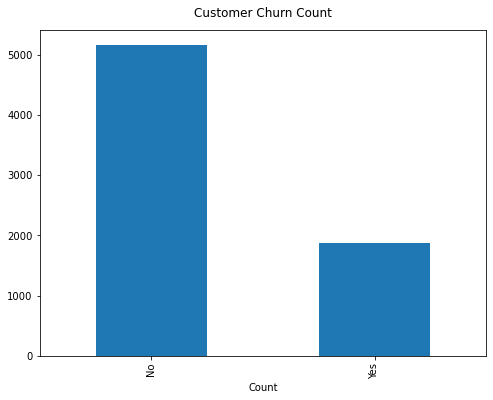

In [103]:
telco_data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Count")
plt.title("Customer Churn Count", y=1.02);

In [104]:
telco_data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [105]:
telco_data.shape

(7032, 21)

In [106]:
# grouping based on tenures of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)


In [107]:
telco_data['tenure_group'].value_counts()


1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [108]:
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

### Univariate Analysis

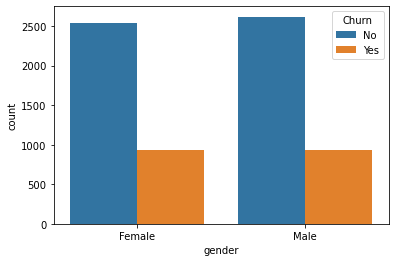

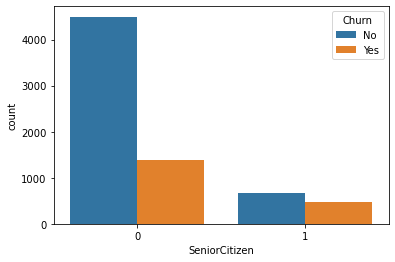

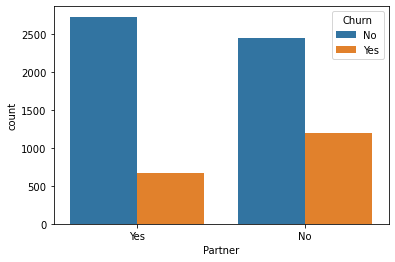

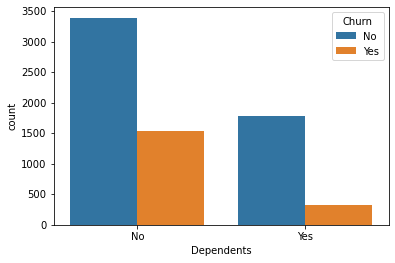

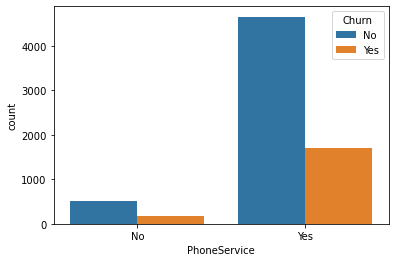

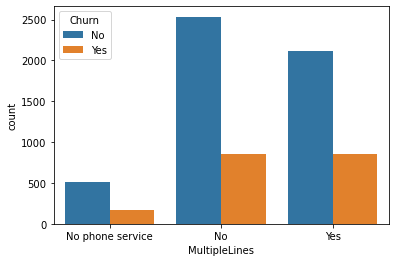

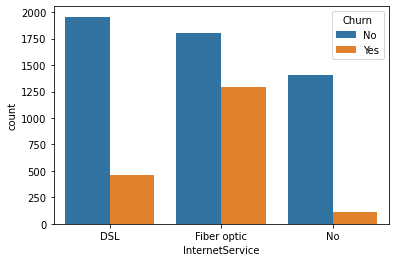

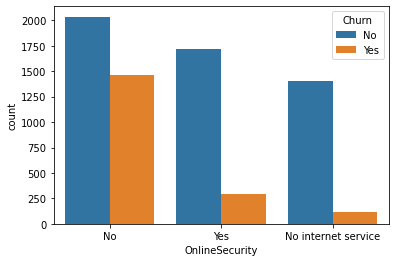

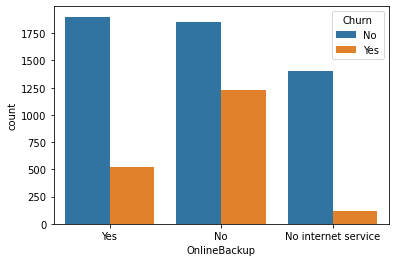

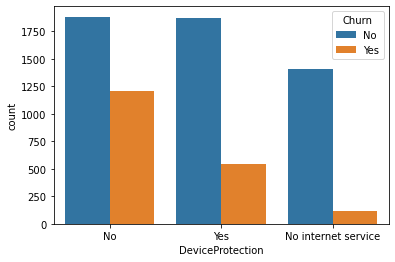

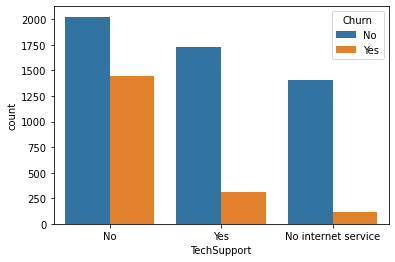

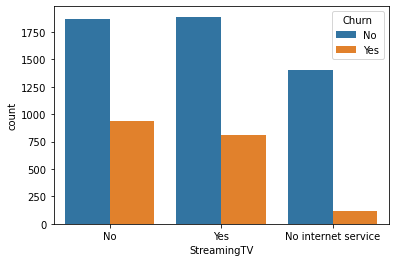

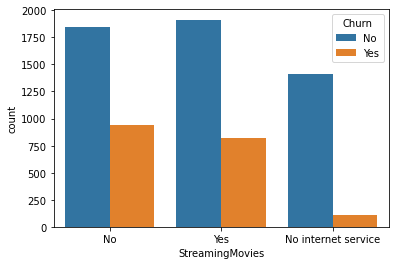

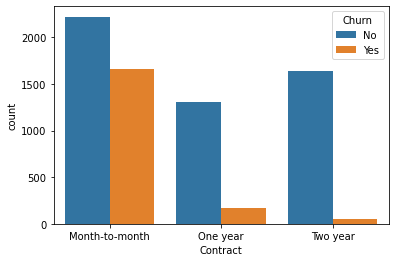

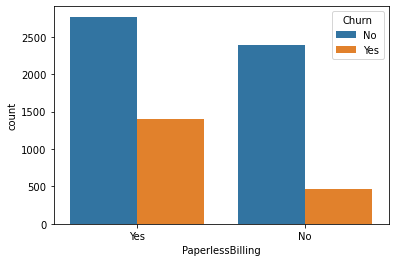

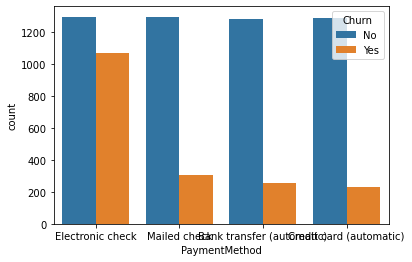

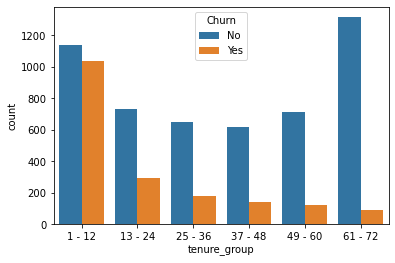

In [109]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

In [110]:
telco_data_dummies = pd.get_dummies(telco_data,drop_first=True)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,56.95,1889.50,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,0,1,0,0,1,...,1,0,1,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Monthly charges by churn')

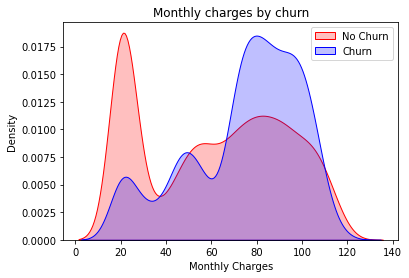

In [111]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn_Yes"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn_Yes"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

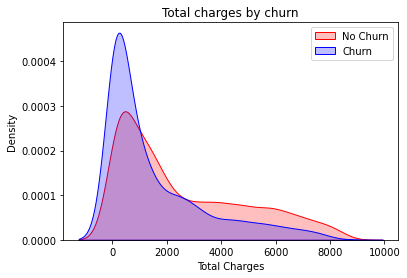

In [112]:
Mth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn_Yes"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn_Yes"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

<AxesSubplot:>

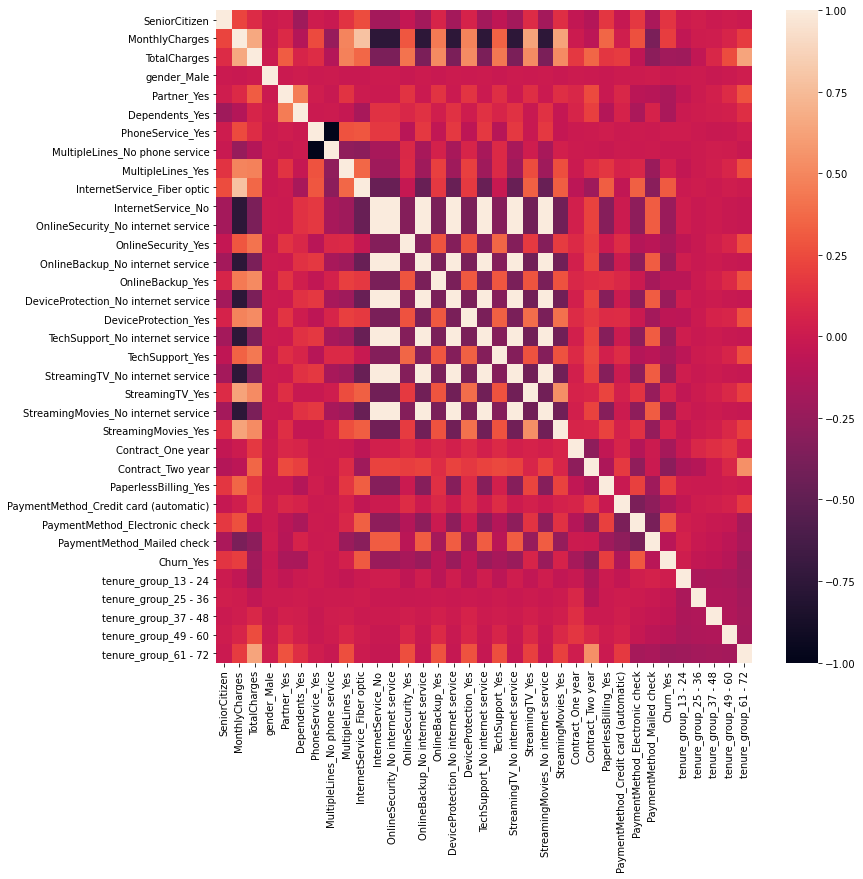

In [113]:
# Build a corelation of all predictors with 'Churn'

plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr())

In [114]:
telco_data_dummies.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
SeniorCitizen,1.000000,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,0.254923,...,0.156258,-0.024359,0.171322,-0.152987,0.150541,0.001860,0.027317,-0.000929,0.014186,-0.002407
MonthlyCharges,0.219874,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,0.787195,...,0.351930,0.030055,0.271117,-0.376568,0.192858,-0.047220,0.009465,0.017614,0.070048,0.185440
TotalCharges,0.102411,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,0.360769,...,0.157830,0.182663,-0.060436,-0.294708,-0.199484,-0.210745,-0.047370,0.083696,0.252905,0.639312
gender_Male,-0.001819,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,-0.011189,...,-0.011902,0.001632,0.000844,0.013199,-0.008545,-0.000649,0.006249,-0.020658,-0.004319,0.016279
Partner_Yes,0.016957,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,0.001235,...,-0.013957,0.082327,-0.083207,-0.096948,-0.149982,-0.048481,0.003131,0.035092,0.105341,0.280353
Dependents_Yes,-0.210550,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,-0.164101,...,-0.110131,0.061134,-0.149274,0.056448,-0.163128,-0.001459,0.009289,0.023544,0.031419,0.118090
PhoneService_Yes,0.008392,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,0.290183,...,0.016696,-0.006916,0.002747,-0.004463,0.011691,0.012307,-0.000812,-0.019061,-0.009750,0.020516
MultipleLines_No phone service,-0.008392,-0.248033,-0.113008,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,-0.290183,...,-0.016696,0.006916,-0.002747,0.004463,-0.011691,-0.012307,0.000812,0.019061,0.009750,-0.020516
MultipleLines_Yes,0.142996,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,0.366420,...,0.163746,0.060319,0.083583,-0.227672,0.040033,-0.044944,0.004418,0.027319,0.075740,0.257920
InternetService_Fiber optic,0.254923,0.787195,0.360769,-0.011189,0.001235,-0.164101,0.290183,-0.290183,0.366420,1.000000,...,0.326470,-0.050552,0.335763,-0.305984,0.307463,-0.001494,0.013032,-0.005979,0.017466,0.006112


In [115]:
# saving the csv file
telco_data_dummies.to_csv('tel_churn.csv')

### CONCLUSION


#### These are some of the quick insights from this exercise:

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners

## Model Building

In [116]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,1,0,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0


In [117]:
df=df.drop("Unnamed: 0",axis=1)

In [118]:
x=df.drop('Churn_Yes',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,1,1,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0
7028,0,103.20,7362.90,0,1,1,1,0,1,1,...,0,1,1,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
7030,1,74.40,306.60,1,1,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,0


In [119]:
y=df["Churn_Yes"]

In [120]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Decision Tree Classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [124]:
y_pred=model_dt.predict(x_test)

In [125]:
model_dt.score(x_test,y_test)

0.775408670931059

In [126]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1029
           1       0.61      0.47      0.53       378

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



[[915 114]
 [202 176]]


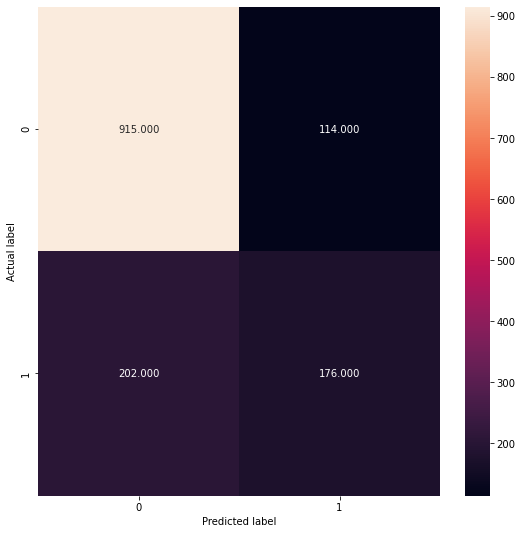

In [127]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".3f")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\ppdsp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
y_pred=model_dt.predict(x_test)

In [131]:
model.score(x_test,y_test)

0.7896233120113717

In [132]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1029
           1       0.61      0.47      0.53       378

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



[[915 114]
 [202 176]]


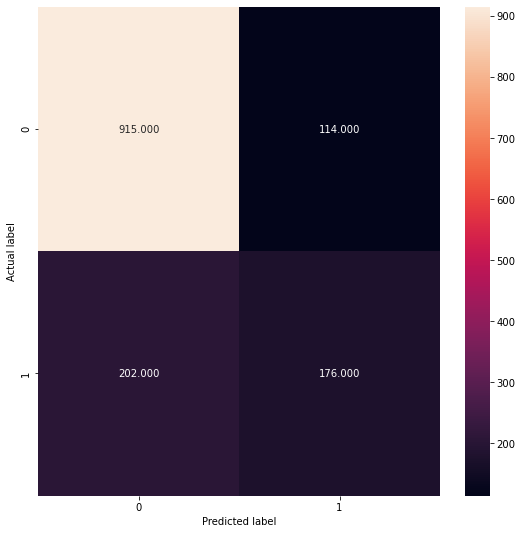

In [133]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".3f")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Finding best model and hyper parameter tunning using GridSearchCV

In [134]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 

In [136]:

model_params = {
   
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{
             'criterion': ['gini','entropy'],
            'max_depth':[3,4,5]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    }
    
}

In [137]:
clf = GridSearchCV(LogisticRegression(solver="liblinear"), { 'C': [1,5,10]},return_train_score=True)
clf.fit(x_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.05218534, 0.05585165, 0.05458694]),
 'std_fit_time': array([0.0030268 , 0.00195561, 0.00303971]),
 'mean_score_time': array([0.00577912, 0.00479841, 0.00459323]),
 'std_score_time': array([0.00074756, 0.00074686, 0.00047984]),
 'param_C': masked_array(data=[1, 5, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 5}, {'C': 10}],
 'split0_test_score': array([0.80533333, 0.8       , 0.80177778]),
 'split1_test_score': array([0.80088889, 0.80177778, 0.80177778]),
 'split2_test_score': array([0.80888889, 0.80888889, 0.80977778]),
 'split3_test_score': array([0.80088889, 0.80088889, 0.80088889]),
 'split4_test_score': array([0.80355556, 0.79911111, 0.79911111]),
 'mean_test_score': array([0.80391111, 0.80213333, 0.80266667]),
 'std_test_score': array([0.0030065 , 0.00349278, 0.00368648]),
 'rank_test_score': array([1, 3, 2]),
 'split0_train_score': array([0.80644444, 0.80666667, 0.808     

In [138]:
clf = GridSearchCV(RandomForestClassifier(), { 'n_estimators': [1,5,10]},return_train_score=True)
clf.fit(x_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.02389874, 0.07921143, 0.1469255 ]),
 'std_fit_time': array([0.00349191, 0.00580329, 0.00359753]),
 'mean_score_time': array([0.00558925, 0.00899997, 0.01268582]),
 'std_score_time': array([0.00049455, 0.00103217, 0.00157461]),
 'param_n_estimators': masked_array(data=[1, 5, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1}, {'n_estimators': 5}, {'n_estimators': 10}],
 'split0_test_score': array([0.73155556, 0.75822222, 0.78844444]),
 'split1_test_score': array([0.74666667, 0.75822222, 0.78311111]),
 'split2_test_score': array([0.71288889, 0.75733333, 0.792     ]),
 'split3_test_score': array([0.72444444, 0.76711111, 0.77866667]),
 'split4_test_score': array([0.74222222, 0.77422222, 0.79644444]),
 'mean_test_score': array([0.73155556, 0.76302222, 0.78773333]),
 'std_test_score': array([0.01217486, 0.00664233, 0.00629544]),
 'rank_test_score': array([3, 2, 1]),
 'split0_train_score

In [139]:
clf = GridSearchCV( DecisionTreeClassifier(), { 'criterion': ['gini','entropy'],'max_depth':[3,4,5]},return_train_score=True)
clf.fit(x_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.02055082, 0.02580023, 0.02958574, 0.02321911, 0.02978244,
        0.03405323]),
 'std_fit_time': array([0.00253538, 0.0016246 , 0.00051694, 0.00176462, 0.00014023,
        0.00148571]),
 'mean_score_time': array([0.00488553, 0.00418715, 0.00440183, 0.00458975, 0.00438647,
        0.00398741]),
 'std_score_time': array([9.23767491e-04, 3.90060793e-04, 5.09859424e-04, 7.98826470e-04,
        4.87606003e-04, 6.20914490e-06]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 4, 5, 3, 4, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'max_depth': 3},
  {'criterion': 'gini', 'max_depth': 4},
  {'criterion': 'gini', 'max_depth': 5},
  {'crit

In [140]:
clf = GridSearchCV( MultinomialNB(), { },return_train_score=True)
clf.fit(x_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.0102838]),
 'std_fit_time': array([0.00143916]),
 'mean_score_time': array([0.00441875]),
 'std_score_time': array([0.00048145]),
 'params': [{}],
 'split0_test_score': array([0.66222222]),
 'split1_test_score': array([0.688]),
 'split2_test_score': array([0.656]),
 'split3_test_score': array([0.68088889]),
 'split4_test_score': array([0.68355556]),
 'mean_test_score': array([0.67413333]),
 'std_test_score': array([0.01262848]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.67422222]),
 'split1_train_score': array([0.67622222]),
 'split2_train_score': array([0.67577778]),
 'split3_train_score': array([0.67488889]),
 'split4_train_score': array([0.674]),
 'mean_train_score': array([0.67502222]),
 'std_train_score': array([0.00086181])}

In [141]:
clf = GridSearchCV(GaussianNB() , { },return_train_score=True)
clf.fit(x_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.01220407]),
 'std_fit_time': array([0.00044718]),
 'mean_score_time': array([0.00490279]),
 'std_score_time': array([0.00049494]),
 'params': [{}],
 'split0_test_score': array([0.65155556]),
 'split1_test_score': array([0.67733333]),
 'split2_test_score': array([0.67288889]),
 'split3_test_score': array([0.66044444]),
 'split4_test_score': array([0.71466667]),
 'mean_test_score': array([0.67537778]),
 'std_test_score': array([0.02165243]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.68911111]),
 'split1_train_score': array([0.672]),
 'split2_train_score': array([0.68111111]),
 'split3_train_score': array([0.68155556]),
 'split4_train_score': array([0.67133333]),
 'mean_train_score': array([0.67902222]),
 'std_train_score': array([0.00664827])}

In [142]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.782044,{'n_estimators': 10}
1,logistic_regression,0.803911,{'C': 1}
2,decision_tree,0.794133,"{'criterion': 'gini', 'max_depth': 4}"
3,naive_bayes_gaussian,0.675378,{}
4,naive_bayes_multinomial,0.674133,{}


## Scaling 

In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-0.44032709, -1.16169394, -0.99419409, ..., -0.34861311,
        -0.36632438, -0.50013332],
       [-0.44032709, -0.26087792, -0.17373982, ..., -0.34861311,
        -0.36632438, -0.50013332],
       [-0.44032709, -0.36392329, -0.95964911, ..., -0.34861311,
        -0.36632438, -0.50013332],
       ...,
       [-0.44032709, -1.17000405, -0.85451414, ..., -0.34861311,
        -0.36632438, -0.50013332],
       [ 2.27103902,  0.31916782, -0.87209546, ..., -0.34861311,
        -0.36632438, -0.50013332],
       [-0.44032709,  1.35793167,  2.01234407, ..., -0.34861311,
        -0.36632438,  1.99946688]])

In [153]:

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [157]:
# Logistic regression
model = LogisticRegression()
model.fit(X_train_sc, y_train_sc)
model.score(X_test_sc, y_test_sc)

0.7938877043354655

In [160]:

model_params = {
   
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{
             'criterion': ['gini','entropy'],
            'max_depth':[3,4,5]
        }
    }
}
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_sc, y_train_sc)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.774578,{'n_estimators': 10}
1,logistic_regression,0.802133,{'C': 5}
2,decision_tree,0.799644,"{'criterion': 'gini', 'max_depth': 5}"


slighlty better results with scaling

## Principal Component Analysis (PCA)

In [163]:
from sklearn.decomposition import PCA
pca=PCA(0.90) # retain 95% of useful features
X_pca = pca.fit_transform(X_scaled)
X_pca.shape


(7032, 18)

In [164]:
X_pca

array([[-0.4992764 , -2.84139406,  3.51638365, ..., -1.1995393 ,
         0.50397324, -0.17627473],
       [-0.17607694, -1.1817074 ,  1.15258688, ...,  0.5401353 ,
        -0.7434812 ,  1.53028276],
       [-0.22514146, -1.69503063,  0.87056792, ..., -0.348756  ,
         0.52662561,  1.45960631],
       ...,
       [-0.37873742, -2.35739557,  4.04295641, ...,  0.47292193,
        -1.27866404,  0.98795544],
       [-0.6765901 , -1.68663095, -1.36167354, ...,  0.51194938,
        -0.83448198, -0.62169592],
       [-3.00507635,  2.54718727,  0.06012346, ...,  1.90029673,
        -0.14126709,  0.75969294]])

In [165]:
pca.explained_variance_ratio_  #what is variation of each col

array([0.29219921, 0.10225977, 0.07953878, 0.04258061, 0.04147652,
       0.03683306, 0.03412315, 0.03334111, 0.03321418, 0.03133388,
       0.02939272, 0.02741946, 0.02617298, 0.0241376 , 0.02154763,
       0.0206519 , 0.01972823, 0.01808913])

In [166]:
pca.n_components_

18

In [167]:
X_scaled.shape

(7032, 34)

In [168]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=30)


In [169]:

model = LogisticRegression()
model.fit(X_train_pca, y_train_pca)
model.score(X_test_pca, y_test_pca)

0.783226723525231

In [170]:

model_params = {
   
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{
             'criterion': ['gini','entropy'],
            'max_depth':[3,4,5]
        }
    }
}
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_pca, y_train_pca)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.763733,{'n_estimators': 10}
1,logistic_regression,0.794311,{'C': 5}
2,decision_tree,0.778133,"{'criterion': 'entropy', 'max_depth': 4}"


With PCA, we couldn't see any better results,

Best results are with logistic regression without scaling/

In [177]:

model = LogisticRegression(C=1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\Users\ppdsp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7896233120113717

## Pickling the model
we will use and prepare API's so that we can access our model from UI.

In [178]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r1 = load_model.score(x_test, y_test)
model_score_r1

0.7896233120113717